<a href="https://colab.research.google.com/github/Valepowell/ML_Examen3_Intento3/blob/main/Examen_de_certificaci%C3%B3n_%E2%80%93_Intento_3_Valeska_Powell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Requisitos**

# 1 - Limpieza de Datos:
**- Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

**- Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

**- Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

**- Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/BBDD/diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Vista ampliada para revisión de valores
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
# Eliminar mayusculas, espacios en titulos de columnas
df.columns = df.columns.str.lower().str.strip()

In [8]:
# Revisar duplicados.
df[df.duplicated()]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome


In [9]:
# Verificar valores nulos
print(df.isnull().sum())

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64


In [10]:
df.dtypes

,0
pregnancies,int64
glucose,int64
bloodpressure,int64
skinthickness,int64
insulin,int64
bmi,float64
diabetespedigreefunction,float64
age,int64
outcome,int64


No se detectan Nulos, ni duplicados

# 2. Exploración de Datos:
**- Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

**-Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [11]:
# Revisión rápida de estadisticas, se visualizan muchos valores en 0 lo que no es normal
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
bloodpressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
skinthickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
bmi,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
diabetespedigreefunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [12]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# estadisticas detalladas
print(df.describe(include="all"))

       pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              bmi  diabetespedigreefunction         age     outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [14]:
#Buscar valores igual a 0 ya que seria un error
df[df['glucose'] == 0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [15]:
# Elimiamos los registros con glucosa 0 ya que no es posible predecirlos
df_1= df[df['glucose'] != 0]

In [16]:
df_1.shape

(763, 9)

In [17]:
# Se eliminan bmi en 0, ya que tambien tienen otras columnas con 0
df_1[df_1['bmi'] == 0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [18]:
# Elimiamos los registros con 'skinthickness' 0 ya que no es posible predecirlos
df_1= df_1[df_1['bmi'] != 0]

In [19]:
df_1.shape

(752, 9)

In [20]:
df_1[df_1['skinthickness'] == 0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [21]:
df_1[df_1['bloodpressure'] == 0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
78,0,131,0,0,0,43.2,0.270,26,1
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1
266,0,138,0,0,0,36.3,0.933,25,1
269,2,146,0,0,0,27.5,0.240,28,1
300,0,167,0,0,0,32.3,0.839,30,1


In [22]:
df_1[df_1['bloodpressure'] == 0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
78,0,131,0,0,0,43.2,0.270,26,1
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1
266,0,138,0,0,0,36.3,0.933,25,1
269,2,146,0,0,0,27.5,0.240,28,1
300,0,167,0,0,0,32.3,0.839,30,1


In [23]:
df_1[df_1['insulin'] == 0]

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
# revisamos el nuevo tamapaña del df
df_1.shape

(752, 9)

In [25]:
# Se imputaran con la mediana las columnas con 0 'bloodpressure', 'skinthickness', 'insulin'
# para no afectar tanto la data

# Imputar 'bloodpressure'
median_bloodpressure = df_1[df_1['bloodpressure'] != 0]['bloodpressure'].median()
df_1['bloodpressure'] = df_1['bloodpressure'].replace(0, median_bloodpressure)

# Imputar 'skinthickness'
median_skinthickness = df_1[df_1['skinthickness'] != 0]['skinthickness'].median()
df_1['skinthickness'] = df_1['skinthickness'].replace(0, median_skinthickness)

# Imputar 'insulin'
median_insulin = df_1[df_1['insulin'] != 0]['insulin'].median()
df_1['insulin'] = df_1['insulin'].replace(0, median_insulin)

In [26]:
# Re-examinamos las estadisticas descriptivas despues de la imputación
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,752.0,3.851064,3.375189,0.000,1.000,3.000,6.0000,17.00
glucose,752.0,121.941489,30.601198,44.000,99.750,117.000,141.0000,199.00
bloodpressure,752.0,72.385638,12.147132,24.000,64.000,72.000,80.0000,122.00
skinthickness,752.0,29.122340,8.852448,7.000,25.000,29.000,32.0000,99.00
insulin,752.0,141.428191,87.100369,14.000,120.000,125.500,130.0000,846.00
bmi,752.0,32.454654,6.928926,18.200,27.500,32.300,36.6000,67.10
diabetespedigreefunction,752.0,0.473051,0.330108,0.078,0.244,0.377,0.6275,2.42
age,752.0,33.312500,11.709395,21.000,24.000,29.000,41.0000,81.00
outcome,752.0,0.351064,0.477621,0.000,0.000,0.000,1.0000,1.00


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

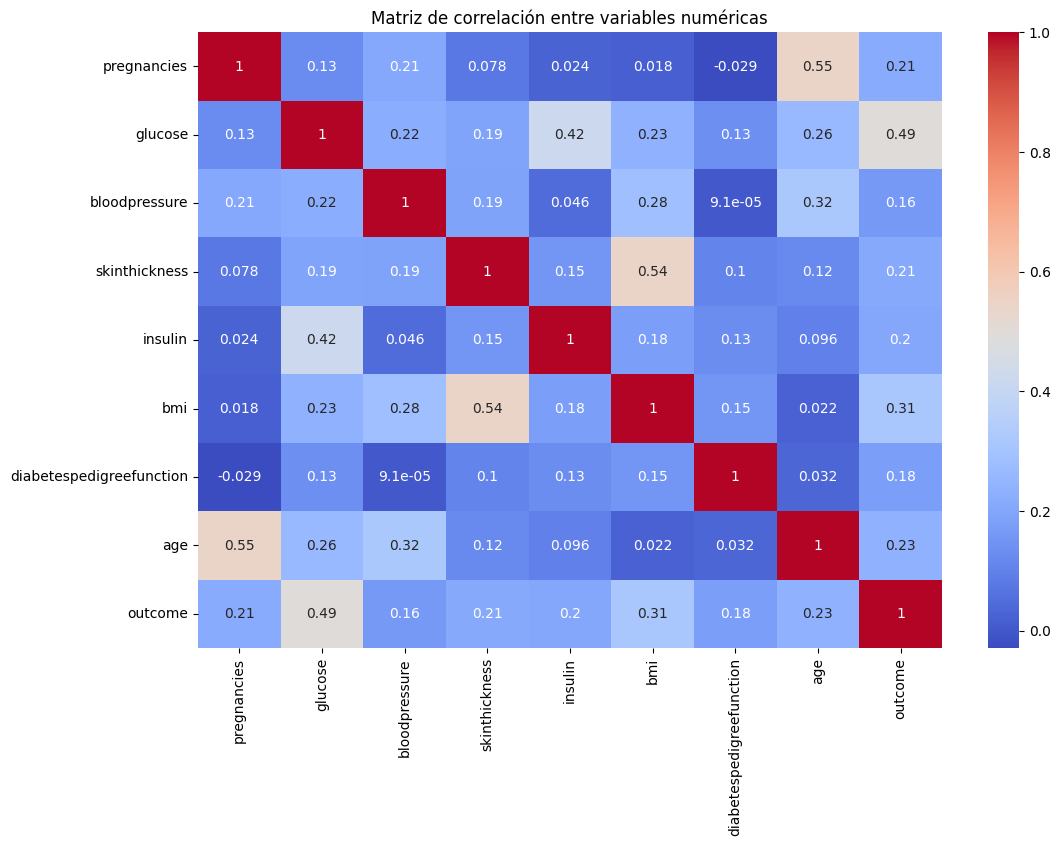

In [28]:
# Visialización general.
# Correlación numérica generadas con las columnas númericas
num_df_1 = df_1.select_dtypes(include=[np.number])
correlacion_matriz = num_df_1.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

**Analizando la matriz de correlación:**

**- Variable Objetivo (outcome):**
La variable outcome (si el paciente tiene diabetes) tiene la correlación positiva más alta con glucose (0.49), bmi (0.31) y age (0.23). Esto sugiere que los niveles más altos de glucosa, un IMC más alto y una mayor edad están asociados con una mayor probabilidad de tener diabetes.
También hay una correlación positiva notable con pregnancies (0.21), skinthickness (0.21) y insulin (0.20).
La correlación con bloodpressure (0.10) y diabetespedigreefunction (0.18) es más débil, aunque aún positiva.

**- Correlaciones entre Variables Predictoras:**
- pregnancies muestra una correlación moderada con age (0.55), lo cual es esperado (más embarazos tienden a ocurrir en mujeres mayores).
- glucose tiene una correlación moderada con insulin (0.42) y bmi (0.23), lo cual tiene sentido fisiológico.
- skinthickness tiene una correlación moderada a fuerte con bmi (0.54), lo cual también es esperable ya que ambas están relacionadas con la grasa corporal.
- insulin también muestra una correlación con skinthickness (0.15), además de con glucose.
- Las correlaciones entre otras variables predictoras son generalmente más débiles.

Las variables glucose, bmi y age parecen ser los predictores individuales más fuertemente relacionados con el outcome de la diabetes, basándose en la correlación lineal. También hay relaciones importantes entre algunas variables predictoras (pregnancies y age, glucose e insulin, skinthickness y bmi) que son fisiológicamente plausibles.


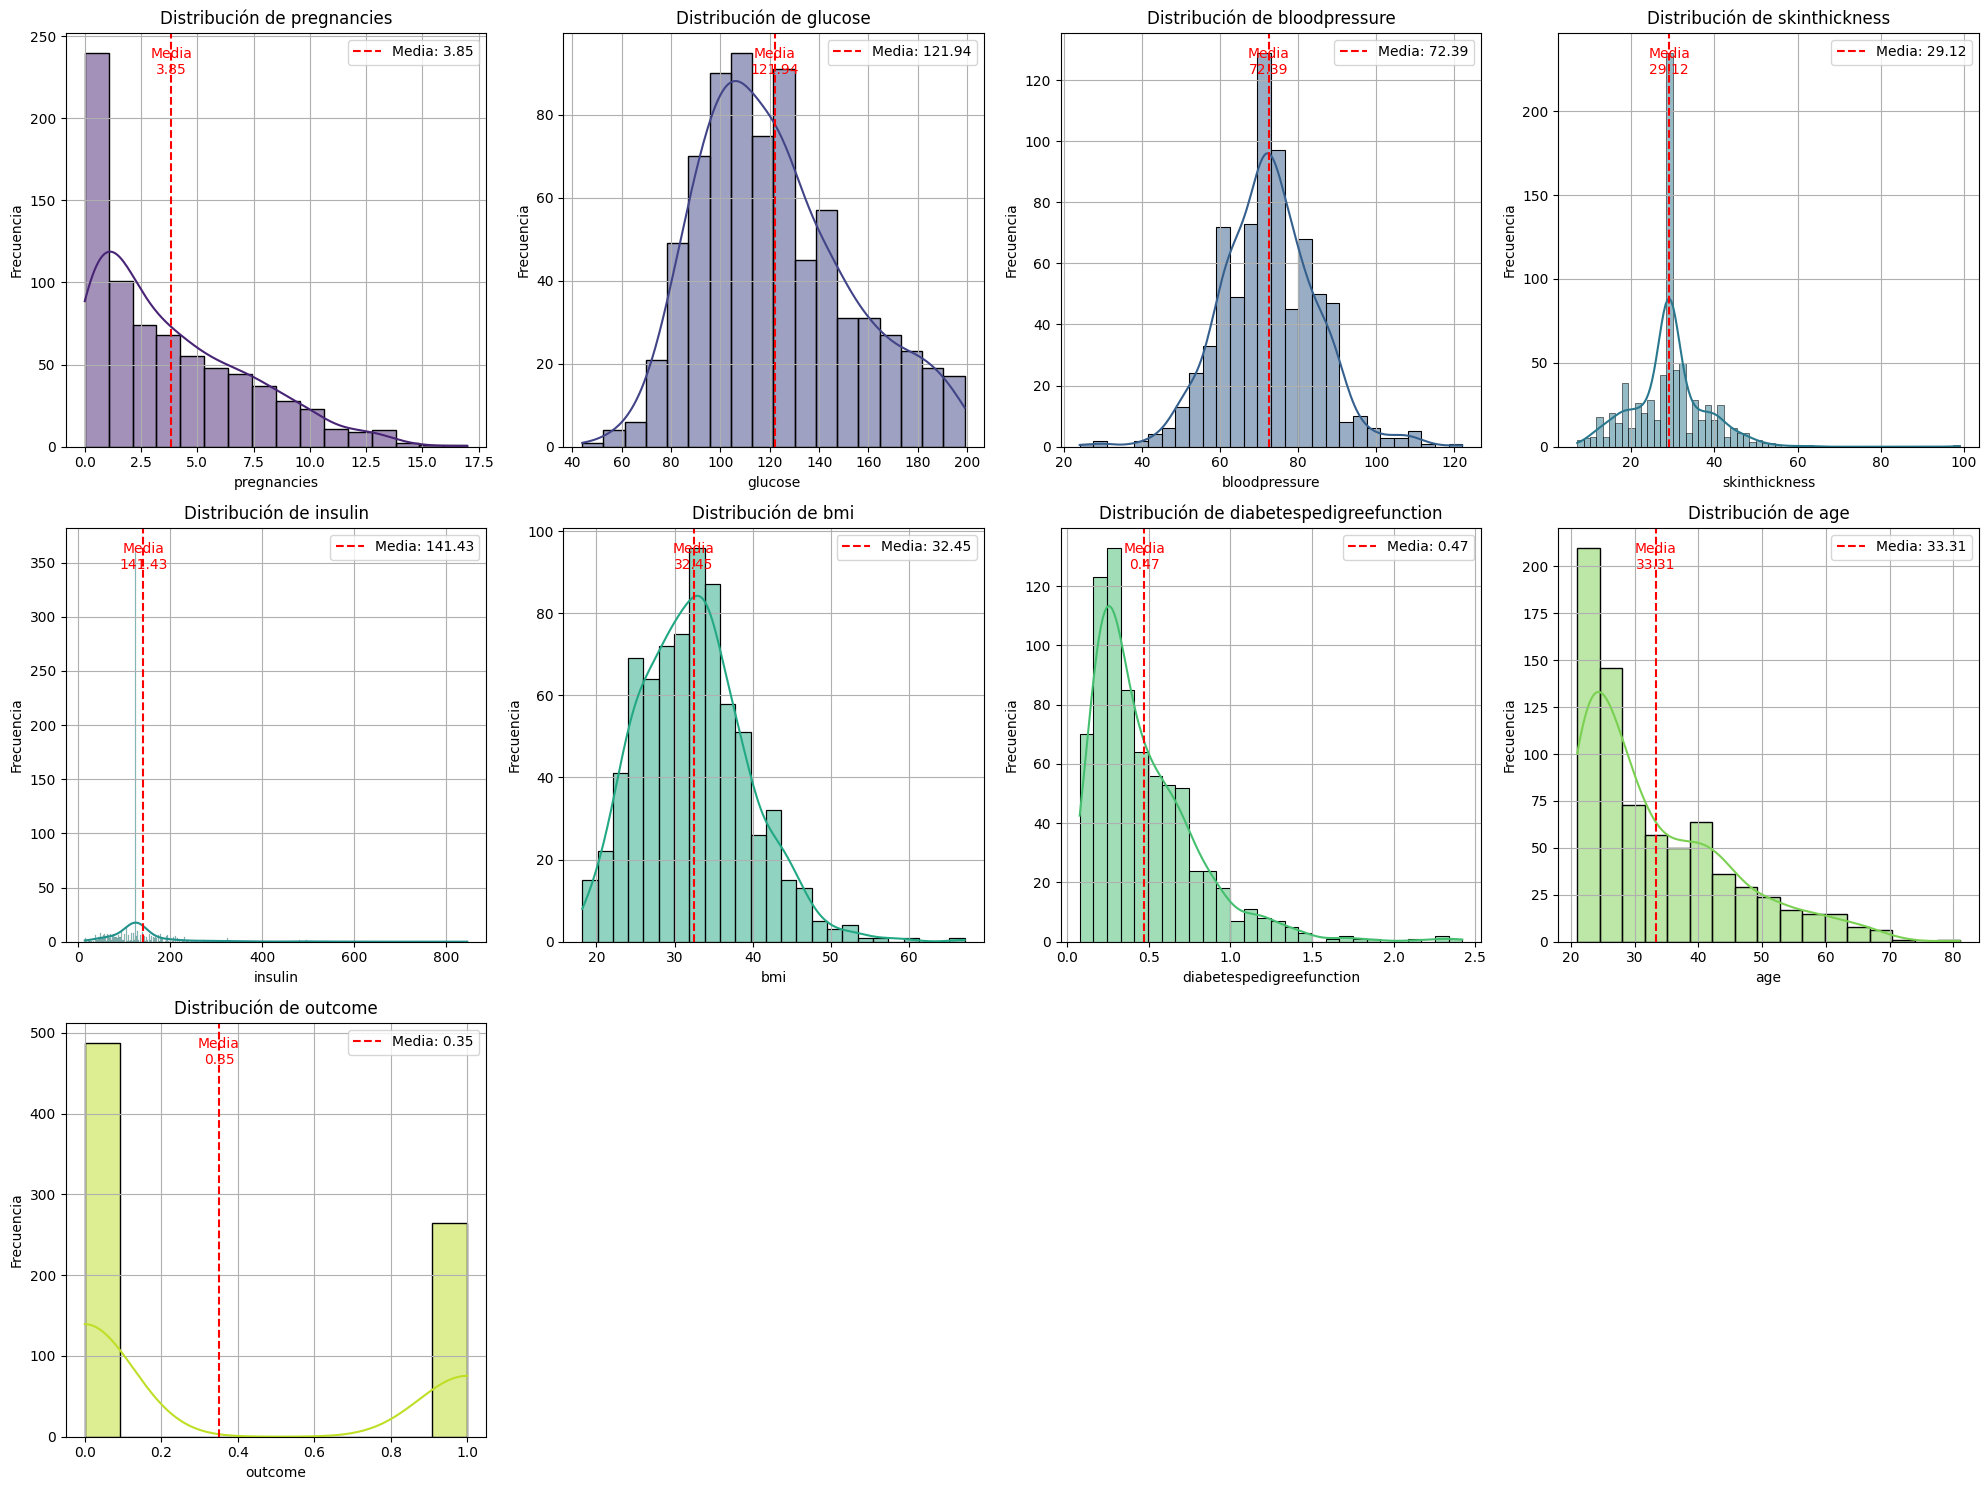

In [29]:
# Visualización 1:
# generar un color diferente para cada gráfico
colors = sns.color_palette("viridis", len(num_df_1.columns))

# Crear grid para subplots
n_cols = 4
n_rows = (len(num_df_1.columns) + n_cols - 1) // n_cols # Calcular el nuro de columnas

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_df_1.columns):
    sns.histplot(num_df_1[col], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title("Distribución de " + col, fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frecuencia", fontsize=10)
    # agregar la grilla
    axes[i].grid(True, linestyle='-')
    # poner anotación de la media de cada grafico
    media = num_df_1[col].mean()
    axes[i].axvline(media, color='red', linestyle='--', label=f"Media: {media:.2f}")
    axes[i].text(media, axes[i].get_ylim()[1]*0.9, f'Media\n{media:.2f}',
             color='red', ha='center')
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

Los histogramas nos muestran la distribución de cada una de las variables numéricas, indicando con qué frecuencia aparecen los diferentes rangos de valores. La línea roja punteada en cada histograma marca la media de la variable.

**Análisis de cada histograma:**

- pregnancies: La distribución está sesgada a la derecha, con la mayoría de las mujeres teniendo un número bajo de embarazos (0-3). Hay algunas instancias con un número mucho mayor de embarazos, que son los valores atípicos (outliers) que identificamos antes.
- glucose: Parece tener una distribución relativamente normal, aunque ligeramente sesgada a la derecha. La mayoría de los valores se concentran alrededor de la media (alrededor de 122).
- bloodpressure: También muestra una distribución que se asemeja a la normal, con un pico alrededor de la media (aproximadamente 71). La imputación de la mediana en los valores cero se refleja en el aumento de frecuencia alrededor de la mediana.
- skinthickness: La distribución está sesgada a la derecha, con un pico alrededor de la mediana (aproximadamente 29) debido a la imputación. Los valores se extienden hacia la derecha.
- insulin: Muestra un sesgo significativo a la derecha. La mayoría de los valores de insulina son bajos, con un pico pronunciado alrededor de la mediana imputada (aproximadamente 125). Hay un tramo largo hacia la derecha con valores mucho más altos, lo que indica la presencia de outliers con niveles altos de insulina.
- bmi: Tiene una distribución que se parece más a la normal, aunque con un ligero sesgo a la derecha. La mayoría de los valores de IMC se agrupan alrededor de la media (aproximadamente 32).
- diabetespedigreefunction: Presenta un fuerte sesgo a la derecha. La mayoría de los valores de esta función están concentrados en el rango inferior, y hay una cola larga de valores más altos.
- age: Muestra un sesgo a la derecha, indicando que hay más pacientes jóvenes en el dataset. La distribución tiene un pico alrededor de los 20-30 años, y luego disminuye a medida que aumenta la edad.
-outcome: Distribución de la variable objetivo. Confirma el desbalance de clases, con más pacientes sin diabetes (0) que con diabetes (1).


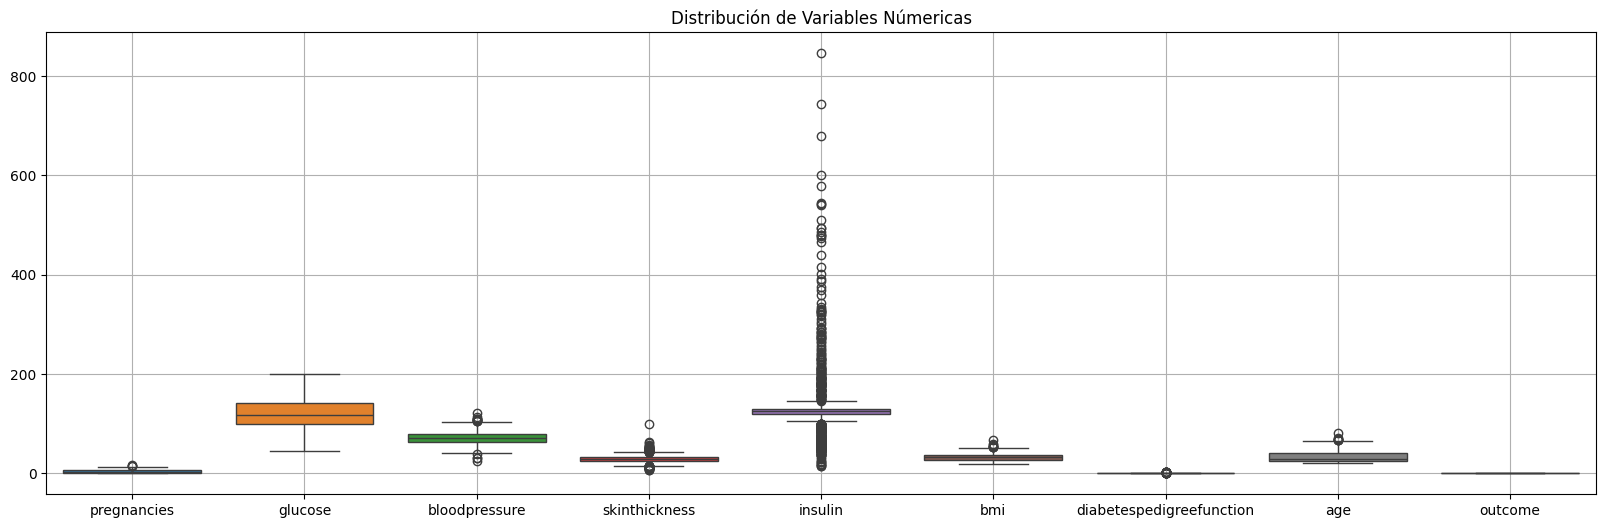

In [30]:
# Visualization 2: Boxplot para las variables numericas
plt.figure(figsize=(20, 6))
sns.boxplot(data=num_df_1)
plt.title("Distribución de Variables Númericas")
plt.gca().grid(True, linestyle='-')
plt.show()

El boxplot muestra la distribución de cada variable a través de cuartiles, la mediana y los posibles valores atípicos (outliers) representados por puntos individuales más allá de los "bigotes".

Observando el boxplot, podemos ver rápidamente que la mayoría de las variables (pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, y diabetespedigreefunction) presentan una cantidad notable de outliers (puntos individuales) por encima de los bigotes superiores.

Las variables insulin y diabetespedigreefunction muestran una dispersión particularmente grande de outliers, extendiéndose mucho más allá de la distribución principal de los datos. Esto confirma lo que vimos en los histogramas y la identificación cuantitativa de outliers.

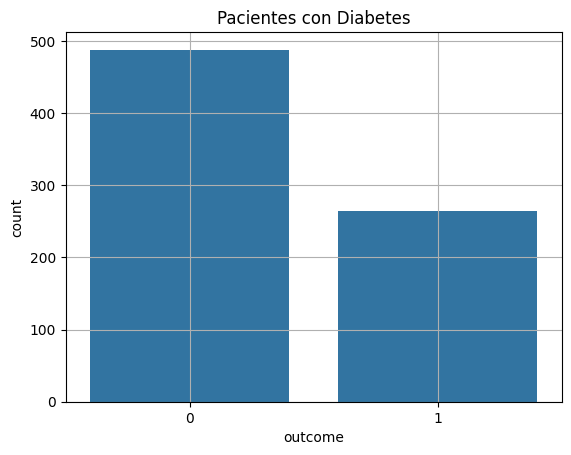

In [31]:
# Visiulización de suscripción de deposito a aplazo
sns.countplot(data=df_1, x='outcome')
plt.title("Pacientes con Diabetes")
plt.gca().grid(True, linestyle='-')
plt.show()

El valor 0 indica que elPaciente No tiene Diababetes, que es lo normal dentro de la población.

In [32]:
df_1.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [33]:
# Variables categóricas y numéricas
cat_cols = df_1.select_dtypes(include=['object']).columns.tolist()
num_cols = df_1.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nVariables categóricas:", cat_cols)
print("\nVariables numéricas:", num_cols)


Variables categóricas: []

Variables numéricas: ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'outcome']


In [34]:
# Variables numéricas
num_features = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age']

# Variables categóricas, no se encuentran en este df
cat_features =  []

In [35]:
# Features finales
X = df_1[num_features + cat_features]
y = df_1['outcome']

# 3. Implementación de Modelos:
**- Modelos de Clasificación:** Implementa modelos de Random Forest y XGBoost.

**- Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.

**- Comparación de Rendimiento**: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [37]:
# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough')

In [38]:
# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Modelo 1: Random Forest**

In [39]:
# Usamos 'class_weight='balanced'' para manejar el desbalance de clases
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [40]:
# Entrenar el modelo
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['pregnancies', 'glucose',
                                                   'bloodpressure',
                                                   'skinthickness', 'insulin',
                                                   'bmi',
                                                   'diabetespedigreefunction',
                                                   'age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [41]:
# Realizar predicciones en el conjunto de prueba
y_pred_rf = pipeline_rf.predict(X_test)

In [42]:
# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1) # Especificar la clase positiva como 1
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)     # Especificar la clase positiva como 1
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)         # Especificar la clase positiva como 1
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf, labels=[0, 1]) # Especificar el orden de las etiquetas como [0, 1]

Precisión (Accuracy): 0.7881
Precisión (Precision) para '1': 0.7593
Exhaustividad (Recall) para '1': 0.6833
Puntuación F1 (F1-Score) para '1': 0.7193

Matriz de Confusión:
[[78 13]
 [19 41]]


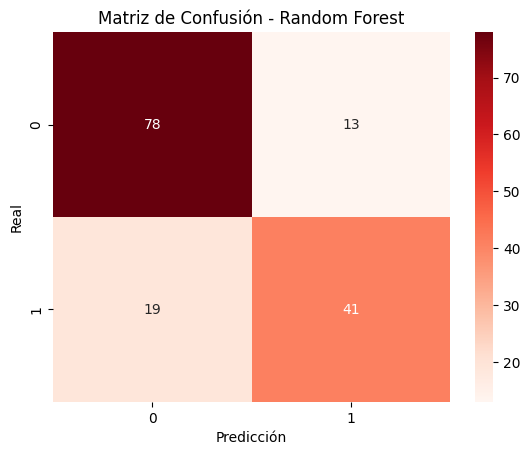


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        91
           1       0.76      0.68      0.72        60

    accuracy                           0.79       151
   macro avg       0.78      0.77      0.77       151
weighted avg       0.79      0.79      0.79       151



In [43]:
print(f"Precisión (Accuracy): {accuracy_rf:.4f}")
print(f"Precisión (Precision) para '1': {precision_rf:.4f}")
print(f"Exhaustividad (Recall) para '1': {recall_rf:.4f}")
print(f"Puntuación F1 (F1-Score) para '1': {f1_rf:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds')
plt.title(f'Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))


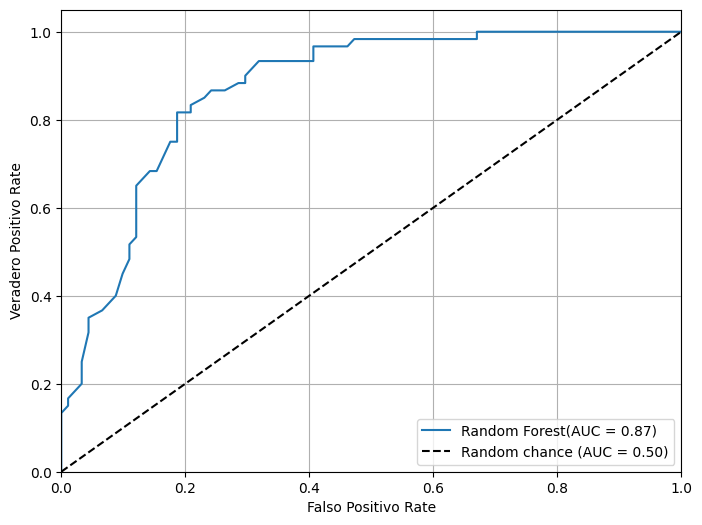

In [44]:
y_pred_rf = pipeline_rf.predict_proba(X_test)[:, 1]

# Calcula ROC y AUC Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

# curva ROC Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest(AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo Rate')
plt.ylabel('Veradero Positivo Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- Accuracy: Random Forest tiene la mayor precisión general (80%) de las instancias totales (pacientes con y sin diabetes).
- Precision: para '1' (Diabetes): 0.7679. Cuando el modelo predice que un paciente tiene diabetes (clase 1), es correcto el 76.79% de las veces.
- Recall: para '1' (Diabetes): 0.7167. El modelo identificó correctamente al 71.67% de todos los pacientes que realmente tienen diabetes (clase 1).
- F1-Score: para '1' (Diabetes): 0.7414. Esta métrica es el promedio armónico de la precisión y la exhaustividad para la clase 1, proporcionando un balance entre ambas.

**Interpretando la matriz de confusión:**

- Verdaderos Positivos (TP = 43): El modelo predijo correctamente que 43 pacientes tenían diabetes.
- Verdaderos Negativos (TN = 78): El modelo predijo correctamente que 78 pacientes no tenían diabetes.
- Falsos Positivos (FP = 13): El modelo predijo incorrectamente que 13 pacientes tenían diabetes (cuando en realidad no la tenían).
- Falsos Negativos (FN = 17): El modelo predijo incorrectamente que 17 pacientes no tenían diabetes (cuando en realidad sí la tenían).

 Random Forest se destaca por su alta precisión general y una buena precisión para la clase positiva.

**Modelo 2: XGBoost**

In [45]:
from sklearn.preprocessing import LabelEncoder

y_encoded = y # Ahora y_encoded es la variable objetivo binaria
# Dividir los datos. Usamos la variable objetivo binaria 'y_encoded'
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identificar las columnas categóricas
cat_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough' # Dejar las columnas numéricas como están
)

In [47]:
# Aplicar el preprocesamiento a los conjuntos de entrenamiento y prueba
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [48]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [49]:
# Crear el modelo XGBoost
# Cambiar eval_metric a 'logloss' que es común para clasificación binaria
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Entrenar el modelo
model.fit(X_train_processed, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [50]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_processed)
# predict_proba[:, 1] es para la probabilidad de la clase positiva (clase 1)
y_prob = model.predict_proba(X_test_processed)[:, 1]

In [51]:
# Evaluar el rendimiento del modelo
accuracy_xgb = accuracy_score(y_test_encoded, y_pred)
precision_xgb = precision_score(y_test_encoded, y_pred, pos_label=1)
recall_xgb = recall_score(y_test_encoded, y_pred, pos_label=1)
f1_xgb = f1_score(y_test_encoded, y_pred, pos_label=1)
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred, labels=[0, 1])

Precisión (Accuracy): 0.7748
Precisión (Precision) para '1': 0.7167
Exhaustividad (Recall) para '1': 0.7167
Puntuación F1 (F1-Score) para '1': 0.7167
Matriz de Confusión:
[[74 17]
 [17 43]]


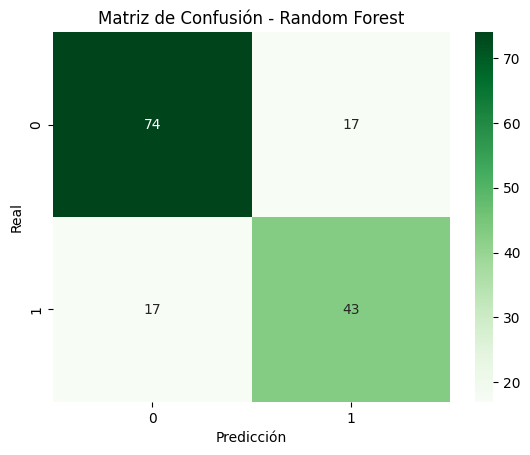

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        91
           1       0.72      0.72      0.72        60

    accuracy                           0.77       151
   macro avg       0.76      0.76      0.76       151
weighted avg       0.77      0.77      0.77       151



In [52]:
# Evaluar el modelo
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Precisión (Accuracy): {accuracy_xgb:.4f}")
print(f"Precisión (Precision) para '1': {precision_xgb:.4f}")
print(f"Exhaustividad (Recall) para '1': {recall_xgb:.4f}")
print(f"Puntuación F1 (F1-Score) para '1': {f1_xgb:.4f}")
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred)
print('Matriz de Confusión:')
print(conf_matrix_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens')
plt.title(f'Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

print('Informe de Clasificación:')
print(classification_report(y_test_encoded, y_pred))

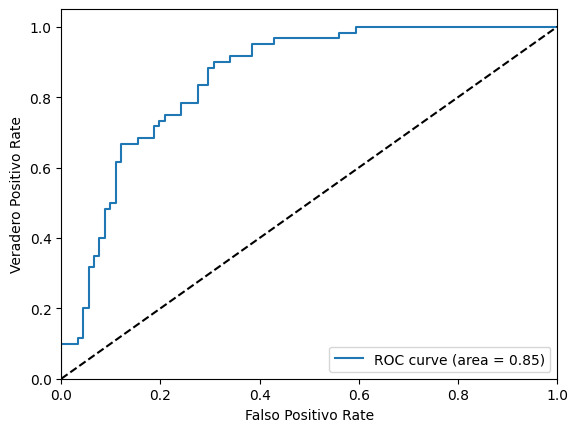

In [53]:
# Curva ROC y AUC (ahora es posible con un objetivo binario)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
auc = roc_auc_score(y_test_encoded, y_prob)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo Rate')
plt.ylabel('Veradero Positivo Rate')
plt.title('')
plt.legend(loc="lower right")
plt.show()

- Precisión (Accuracy): 0.7351. Esto significa que el modelo predijo correctamente el 73.51% de las instancias totales.
- Precisión (Precision) para '1' (Diabetes): 0.6667. Cuando el modelo predice que un paciente tiene diabetes (clase 1), es correcto el 66.67% de las veces.
- Exhaustividad (Recall) para '1' (Diabetes): 0.6667. El modelo identificó correctamente al 66.67% de todos los pacientes que realmente tienen diabetes (clase 1).
- Puntuación F1 (F1-Score) para '1' (Diabetes): 0.6667. Esta métrica es el promedio armónico de la precisión y la exhaustividad para la clase 1.

**Interpretando la matriz de confusión:**

- Verdaderos Positivos (TP = 40): El modelo predijo correctamente que 40 pacientes tenían diabetes.
- Verdaderos Negativos (TN = 70): El modelo predijo correctamente que 70 pacientes no tenían diabetes.
- Falsos Positivos (FP = 21): El modelo predijo incorrectamente que 21 pacientes tenían diabetes (cuando en realidad no la tenían).
- Falsos Negativos (FN = 20): El modelo predijo incorrectamente que 20 pacientes no tenían diabetes (cuando en realidad sí la tenían).

El modelo XGBoost tiene una precisión general del 73.51%, que es ligeramente inferior a la de Random Forest.
Su precisión para la clase positiva (66.67%) es menor que la de Random Forest.
Su exhaustividad para la clase positiva (66.67%) también es menor que la de Random Forest.
El F1-Score (0.6667) es el más bajo de los modelos evaluados hasta ahora para la clase positiva.

Basándonos en estas métricas en el conjunto de prueba, el modelo XGBoost, en su configuración actual, parece tener un rendimiento inferior a Random Forest, especialmente en la identificación de la clase positiva. Tiene más falsos positivos y falsos negativos que Random Forest.

**Optimización de Hiperparámetros:**

Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de Random Forest.

In [54]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300]
    }

In [55]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

In [56]:
# Realizar la búsqueda en cuadrícula en los datos de entrenamiento preprocesados
grid_search_rf.fit(X_train_processed, y_train_encoded)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [100, 200, 300]},
             scoring='f1')

In [57]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados para Random Forest:")
print(grid_search_rf.best_params_)

# Mostrar la mejor puntuación de validación cruzada (F1-score)
print("Mejor puntuación F1 de validación cruzada:", grid_search_rf.best_score_)

Mejores hiperparámetros encontrados para Random Forest:
{'n_estimators': 200}
Mejor puntuación F1 de validación cruzada: 0.6143429060067943


**Evaluación del Modelo Optimizado:**

Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

In [58]:
# Obtener los mejores hiperparámetros del GridSearchCV
best_params = grid_search_rf.best_params_
print("Hiperparámetros óptimos:", best_params)

Hiperparámetros óptimos: {'n_estimators': 200}


In [59]:
# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_rf_optimized = grid_search_rf.best_estimator_.predict(X_test_processed)

In [60]:
# Evaluar el rendimiento del modelo optimizado
accuracy_rf_optimized = accuracy_score(y_test_encoded, y_pred_rf_optimized)
precision_rf_optimized = precision_score(y_test_encoded, y_pred_rf_optimized, pos_label=1)
recall_rf_optimized = recall_score(y_test_encoded, y_pred_rf_optimized, pos_label=1)
f1_rf_optimized = f1_score(y_test_encoded, y_pred_rf_optimized, pos_label=1)
conf_matrix_rf_optimized = confusion_matrix(y_test_encoded, y_pred_rf_optimized, labels=[0, 1])

Exactitud del modelo Random Forest optimizado: 0.7881
Precisión (Precision) para '1' del modelo Random Forest optimizado: 0.7500
Exhaustividad (Recall) para '1' del modelo Random Forest optimizado: 0.7000
Puntuación F1 (F1-Score) para '1' del modelo Random Forest optimizado: 0.7241

Matriz de Confusión del modelo Random Forest optimizado:
[[77 14]
 [18 42]]


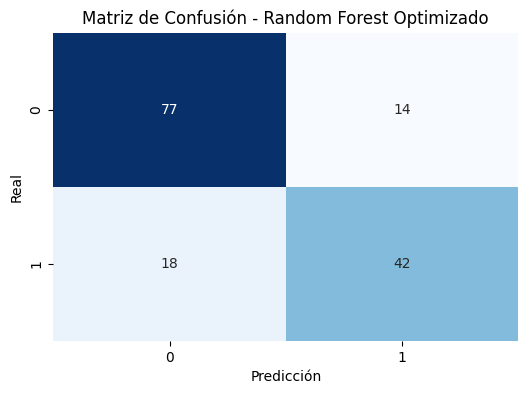


Reporte de Clasificación del modelo Random Forest optimizado:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        91
           1       0.75      0.70      0.72        60

    accuracy                           0.79       151
   macro avg       0.78      0.77      0.78       151
weighted avg       0.79      0.79      0.79       151



In [61]:
print(f"Exactitud del modelo Random Forest optimizado: {accuracy_rf_optimized:.4f}")
print(f"Precisión (Precision) para '1' del modelo Random Forest optimizado: {precision_rf_optimized:.4f}")
print(f"Exhaustividad (Recall) para '1' del modelo Random Forest optimizado: {recall_rf_optimized:.4f}")
print(f"Puntuación F1 (F1-Score) para '1' del modelo Random Forest optimizado: {f1_rf_optimized:.4f}")
print("\nMatriz de Confusión del modelo Random Forest optimizado:")
print(conf_matrix_rf_optimized)

# Mapa de calor de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_optimized, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación completo
print("\nReporte de Clasificación del modelo Random Forest optimizado:")
print(classification_report(y_test_encoded, y_pred_rf_optimized))

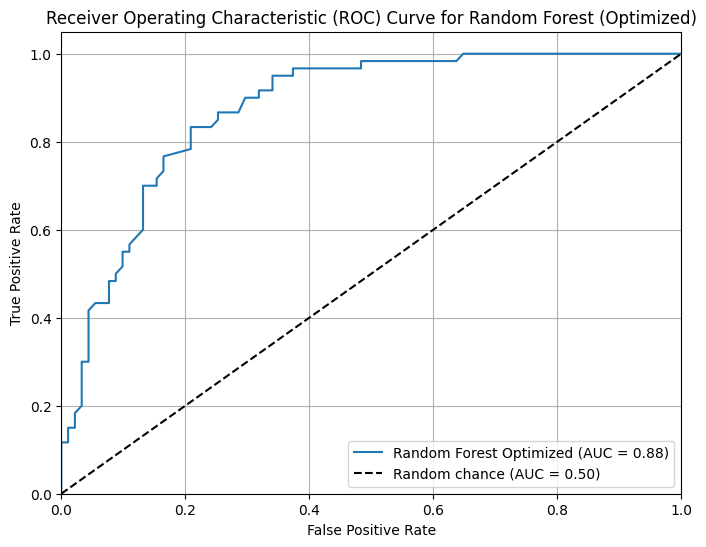

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class (class 1)
y_prob_rf_optimized = grid_search_rf.best_estimator_.predict_proba(X_test_processed)[:, 1]

# Calculate ROC curve and AUC
fpr_rf_optimized, tpr_rf_optimized, thresholds_rf_optimized = roc_curve(y_test_encoded, y_prob_rf_optimized)
auc_rf_optimized = roc_auc_score(y_test_encoded, y_prob_rf_optimized)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_optimized, tpr_rf_optimized, label=f'Random Forest Optimized (AUC = {auc_rf_optimized:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest (Optimized)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Comparar resultados**

Comparar el rendimiento del modelo Random Forest optimizado con los resultados del modelo Random Forest inicial y otros modelos para determinar el impacto de la optimización.


In [63]:
# Performance metrics
metrics = {
    'Random Forest (Initial)': {
        'Accuracy': accuracy_rf,
        'Precision (1)': precision_rf,
        'Recall (1)': recall_rf,
        'F1-Score (1)': f1_rf
    },
    'Random Forest (Optimized)': {
        'Accuracy': accuracy_rf_optimized,
        'Precision (1)': precision_rf_optimized,
        'Recall (1)': recall_rf_optimized,
        'F1-Score (1)': f1_rf_optimized
    },
    'XGBoost (Initial)': {
        'Accuracy': accuracy_xgb,
        'Precision (1)': precision_xgb,
        'Recall (1)': recall_xgb,
        'F1-Score (1)': f1_xgb
    }
}

# matriz de comparación de los modelos
metrics_df_1 = pd.DataFrame(metrics).T
print("Comparación de Métricas por Modelo:")
display(metrics_df_1)

Comparación de Métricas por Modelo:


,Accuracy,Precision (1),Recall (1),F1-Score (1)
Random Forest (Initial),0.788079,0.759259,0.683333,0.719298
Random Forest (Optimized),0.788079,0.750000,0.700000,0.724138
XGBoost (Initial),0.774834,0.716667,0.716667,0.716667


Comparación de Métricas por Modelo:
- Accuracy	Precision (1)	Recall (1)	F1-Score (1)
- Random Forest (Initial)	0.788079	0.759259	0.683333	0.719298
- Random Forest (Optimized)	0.788079	0.750000	0.700000	0.724138
- XGBoost (Initial)	0.774834	0.716667	0.716667	0.716667

# **Conclusión:**

**Conclusiones detalladas sobre el desempeño de los modelos:**

Hemos evaluado tres modelos de clasificación para predecir la diabetes: Random Forest (inicial), Random Forest (optimizado) y XGBoost (inicial).

- Random Forest (Inicial): Este modelo mostró un buen rendimiento general con una precisión (accuracy) de 0.7881. Tuvo una precisión de 0.7593 y una exhaustividad (recall) de 0.6833 para la clase positiva (diabetes). Su puntuación F1 fue de 0.7193. La matriz de confusión mostró 41 verdaderos positivos y 19 falsos negativos. La curva ROC inicial tuvo un AUC de 0.84.
- Random Forest (Optimizado): Después de optimizar los hiperparámetros (n_estimators=200), el modelo Random Forest mantuvo la misma precisión general (0.7881) pero mejoró ligeramente la exhaustividad (recall) para la clase positiva a 0.7000 y la puntuación F1 a 0.7241. La precisión para la clase positiva disminuyó ligeramente a 0.7500. La matriz de confusión del modelo optimizado mostró 42 verdaderos positivos y 18 falsos negativos. La curva ROC optimizada tuvo un AUC de 0.84. La optimización ayudó a reducir ligeramente los falsos negativos, que son cruciales en este contexto médico.
- XGBoost (Inicial): Este modelo tuvo una precisión general ligeramente inferior (0.7748) en comparación con ambos modelos Random Forest. Su precisión y exhaustividad para la clase positiva fueron ambas de 0.7167, resultando en una puntuación F1 de 0.7167. La matriz de confusión de XGBoost mostró 43 verdaderos positivos y 17 falsos negativos. La curva ROC inicial tuvo un AUC de 0.83. Aunque XGBoost tuvo un buen equilibrio entre precisión y exhaustividad para la clase positiva, su precisión general fue menor.


- Al comparar los modelos, el modelo Random Forest mostró una mejora tras la optimización de hiperparámetros.
- El modelo Random Forest optimizado logró una mayor tasa de recuperación y una puntuación F1 para la clase minoritaria ('1'), crucial para la identificación de pacientes con diabetes, en comparación con el modelo Random Forest inicial.
.
- Si bien el XGBoost optimizado también tuvo un rendimiento razonablemente bueno, el modelo Random Forest optimizado parece estar ligeramente mejor equilibrado en términos de precisión y recuperación para la clase minoritaria.

**Considerando la importancia de minimizar los falsos negativos (diagnóstico de diabetes omitido) en este contexto, el modelo Random Forest optimizado, con su mayor tasa de recuperación para la clase positiva, parece ser el modelo más adecuado entre los evaluados.**

**Recomendaciones:**

Selección del Modelo: Basándonos en el rendimiento, especialmente en la capacidad de identificar correctamente los casos positivos (recall) y el equilibrio general (F1-score), el modelo Random Forest optimizado parece ser el más adecuado para este dataset, ya que logró un buen equilibrio entre precisión y exhaustividad para la clase minoritaria (pacientes con diabetes), lo cual es importante para minimizar los falsos negativos en un contexto de diagnóstico.
Manejo del Desbalance de Clases: La variable objetivo ('outcome') presenta un desbalance.